In [1]:
import pandas as pd
from io import StringIO
import numpy as np

In [6]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## train_test_split

In [8]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X,y,
                    test_size=0.3,
                    random_state=0,
                     stratify=y)

## Bringing features onto the same scale(std)

In [20]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

## Selecting meaningful features with L1, L2

## L1 Regularization

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0)
lr.fit(X_train_std, y_train)
lr.coef_

array([[ 1.24629794,  0.18062344,  0.74638948, -1.16408145,  0.        ,
         0.        ,  1.15947197,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55883174,  2.50879171],
       [-1.53645543, -0.38743508, -0.99493535,  0.36503939, -0.05982316,
         0.        ,  0.6684348 ,  0.        ,  0.        , -1.93430676,
         1.23331075,  0.        , -2.23228488],
       [ 0.13575143,  0.16876017,  0.35735447,  0.        ,  0.        ,
         0.        , -2.43707016,  0.        ,  0.        ,  1.56345484,
        -0.81817388, -0.49310927,  0.        ]])

## L2 Regularization

In [23]:
lr2 = LogisticRegression(penalty='l2', C=1.0)
lr2.fit(X_train_std, y_train)
lr2.coef_

array([[ 1.27713853,  0.38210274,  0.8015599 , -1.30842842,  0.22782837,
         0.23101419,  0.90234371, -0.08423823,  0.01462196, -0.0312838 ,
         0.02796323,  0.71703048,  1.79262118],
       [-1.45395571, -0.620303  , -1.05445248,  0.67148394, -0.29048951,
         0.18277571,  0.51163918,  0.10789643,  0.08199321, -1.61228834,
         0.88800662,  0.1659356 , -1.73246957],
       [ 0.38965148,  0.4083047 ,  0.40211468,  0.26242969,  0.15288658,
        -0.20064653, -1.38792256, -0.06305419, -0.28440345,  1.2553389 ,
        -0.93849662, -0.83821807,  0.13754706]])

## Weights, Regularization parameter

In [27]:
weights, params = [], []
for c in np.arange(-3.,6.):  # 음수 지수승을 하려면 float로 만들어줘야 함. 그래서 숫자 뒤에 점(.)을 붙인 것 
    lr = LogisticRegression(penalty='l2', C=10.**c, random_state=0)
    lr.fit(X_train, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

## Drawing plot

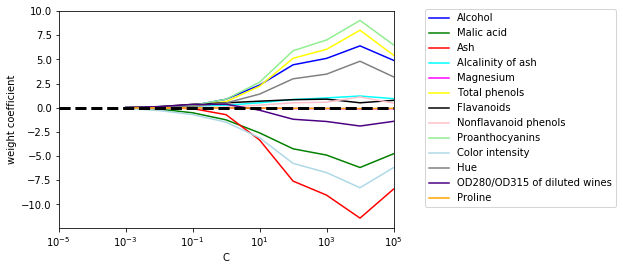

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

## plot 색
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
            label = df_wine.columns[column+1],
            color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5),10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
         bbox_to_anchor=(1.38, 1.03),
         ncol=1, fancybox=True)
plt.show()